#  Book Recommendation 

# Business Objective:

Generate the features from the dataset and use them to recommend 
the books accordingly to the users.


# Project Architecture / Project Flow


# 1. Import Modules and Read Data

Missing Value Handling (If applicable)


Type Casting(If applicable)


removing unncessary rows/columns (through missing value handling and correlation)

Handling Outliers

# 2. EDA

# 3.Model Building

# 4.Model Evaluation

# 5.Model Deployment

Deployed Model on Streamlit/flask

# Import Modules and Read Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [2]:
books=pd.read_csv(r"C:\Users\AJAY\Downloads\Dataset (1)\Books.csv")

In [3]:
ratings=pd.read_csv(r"C:\Users\AJAY\Downloads\Dataset (1)\Ratings.csv")

In [4]:
users=pd.read_csv(r"C:\Users\AJAY\Downloads\Dataset (1)\Users.csv")

# Exploratory Data Analysis & Data Preprocessing

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
missing_years =books.loc[books['Year-Of-Publication']==0,:]
missing_years

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [16]:
#Counting the frequency of each book title:
title_counts = books["Book-Title"].value_counts()

In [17]:
top_10_titles = title_counts.head(10)

In [18]:
user_rating_count = ratings['User-ID'].value_counts()
user_rating_count

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

# comments:

# dealing with null values

In [19]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [20]:
median_age = round(required['Age'].median())   
median_age

32

In [21]:
#outliers with age less than 10 years are substitued with median
#outliers with age less than 10 years are substitued with median
users.loc[users['Age'] > 80, 'Age'] = median_age   
users.loc[users['Age'] < 10, 'Age'] = median_age 

In [22]:
# Fill the null values with the median age
users['Age'] = users['Age'].fillna(median_age)


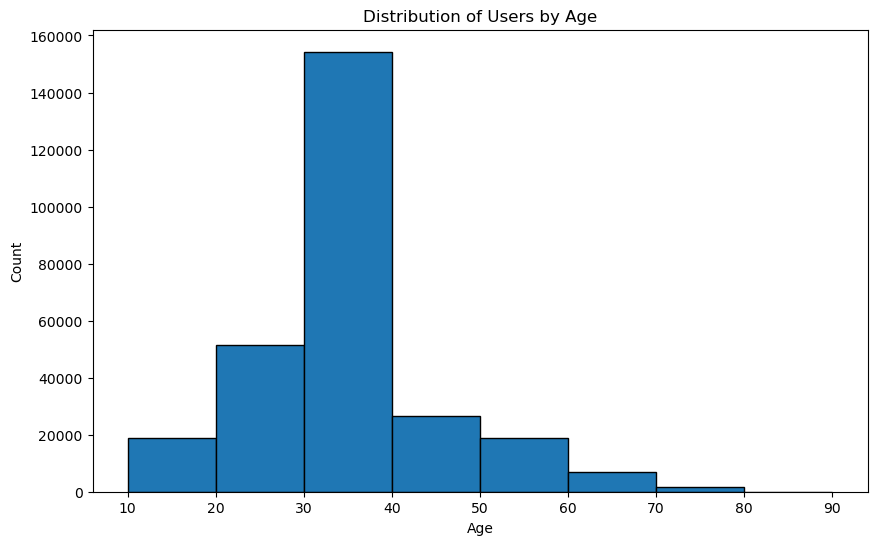

In [23]:
plt.figure(figsize=(10, 6))
users['Age'].plot.hist(bins=[10*i for i in range(1, 10)], edgecolor='k')
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Comments:

The most active users are among those in their 20–30 age

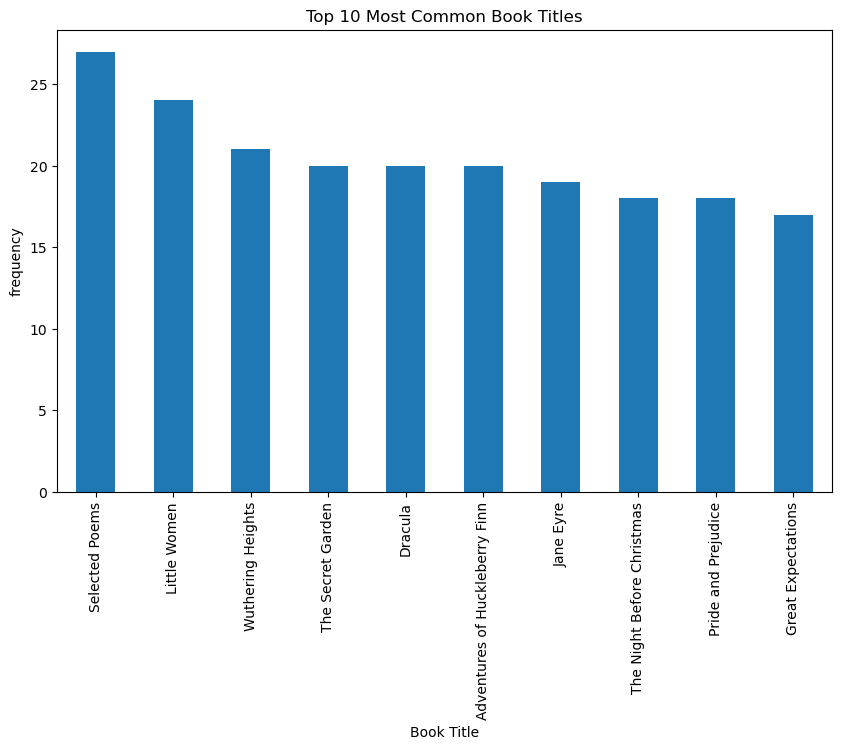

In [24]:
plt.figure(figsize=(10, 6))
top_10_titles.plot(kind="bar")
plt.title("Top 10 Most Common Book Titles")
plt.xlabel("Book Title")
plt.ylabel("frequency")
plt.show()

# Comments:

1.The height of each bar indicates how frequently that book title appears in the dataset. A taller bar indicates a higher frequency.

2.By examining the heights of the bars, we can easily identify the most common or popular book titles in the dataset

In [25]:
author_counts = books["Book-Author"].value_counts()

In [26]:
top_10_authors = author_counts.head(10)

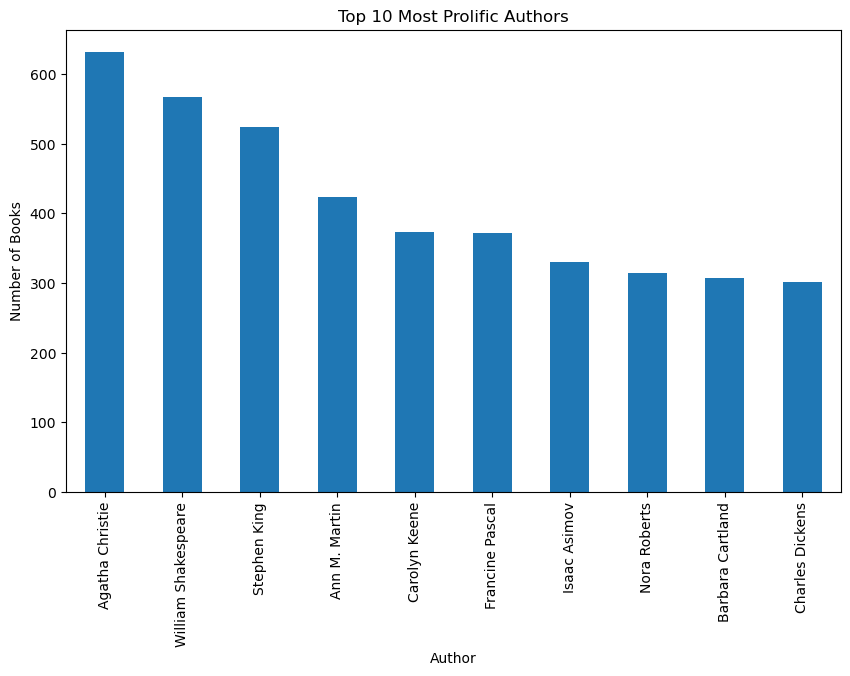

In [27]:
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind="bar")
plt.title("Top 10 Most Prolific Authors")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.show()

# Comments:

 1.The author corresponding to the tallest bar will be the one who has written the highest number of books and the smallest bar represnts the who has written lowest number of books among the top 10 most prolific authors.
 
 2.the author Agatha christie who has written highest number of books and Author cahrles Dickens who written lowest number of books

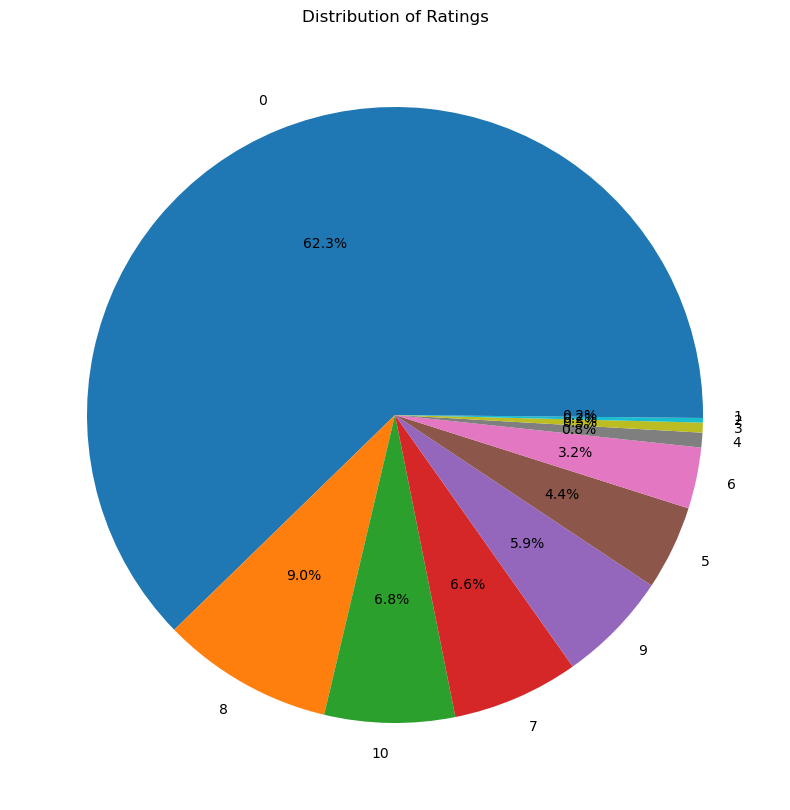

In [28]:
plt.figure(figsize=(10, 10))
ratings["Book-Rating"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Ratings")
plt.ylabel("")
plt.show()

Text(0.5, 1.0, 'Explicit Ratings')

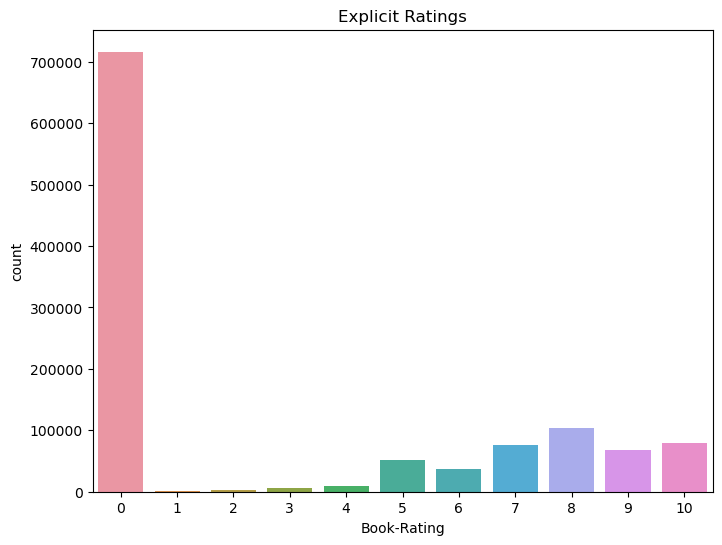

In [29]:
plt.figure(figsize=(8,6))
ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=ratings)
plt.title("Explicit Ratings")

# Comments:

both code blocks aim to provide insights into the distribution of ratings in the dataset. The count plot visualizes the count of each rating value, while the pie chart visualizes the proportions of each rating value.

Text(0.5, 1.0, 'Explicit Ratings')

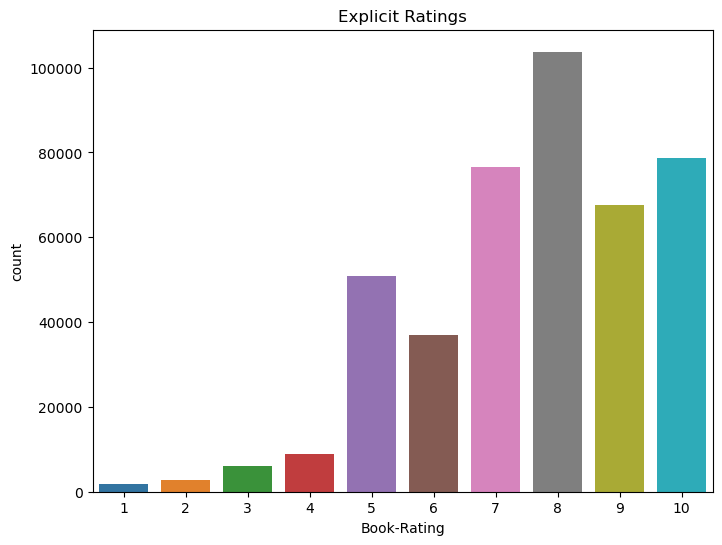

In [30]:
#explicting data
plt.figure(figsize=(8,6))
data=ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

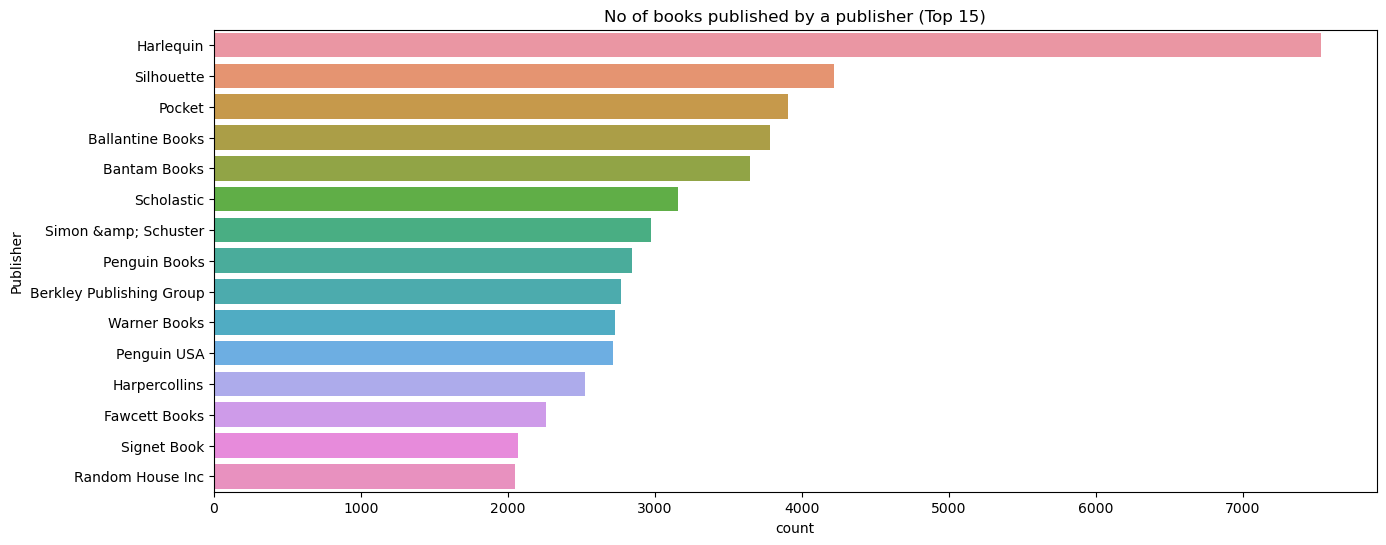

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

# Comments:

The Publisher corresponding to the tallest bar will be the one who has published the highest number of books and the smallest bar represnts the who has published lowest number of books among the top 10 most prolific publisher.

In [32]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

In [33]:
books['Year-Of-Publication'].value_counts().shape

(118,)

In [34]:
year_counts=list(books['Year-Of-Publication'].unique())
year_counts=list(year_counts)
year_counts.sort()
print(year_counts)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [35]:
books.loc[books['Year-Of-Publication']=='DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [36]:
books.loc[books['Year-Of-Publication']=='Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [37]:
books.loc[books.ISBN=='078946697X','Year-Of-Publication']='2000'
books.loc[books.ISBN=='078946697X','Book-Author']='Teitelbaum, Michael'
books.loc[books.ISBN=='078946697X','Book-Title']='The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books.ISBN=='078946697X','Publisher']='DK Children'

books.loc[books.ISBN=='0789466953','Year-Of-Publication']='2000'
books.loc[books.ISBN=='0789466953','Book-Author']='Buckley Jr., James'
books.loc[books.ISBN=='0789466953','Book-Title']='Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books.ISBN=='0789466953','Publisher']='DK Children'

books.loc[(books.ISBN=='078946697X') | (books.ISBN=='0789466953'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"The Story of the X-Men, How It All Began (Leve...","Teitelbaum, Michael",2000,DK Children,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"Creating the X-Men, How Comic Books Come to Li...","Buckley Jr., James",2000,DK Children,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [38]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']='2003'
books.loc[books.ISBN=='2070426769','Book-Author']='Le Clezio, Jean-Marie Gustave'
books.loc[books.ISBN=='2070426769','Book-Title']='Peuple Du Ciel Suivi de les Bergers (Collection Folio) (French Edition)'
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard Education'

books.loc[(books.ISBN=='2070426769'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,Peuple Du Ciel Suivi de les Bergers (Collectio...,"Le Clezio, Jean-Marie Gustave",2003,Gallimard Education,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [39]:
# Replace '0' with the median value
median_year = books['Year-Of-Publication'].median()
books['Year-Of-Publication'] = books['Year-Of-Publication'].replace(0,median_year)


In [40]:
# Remove rows with future publication years
# Assuming the current year is 2022
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')   
books = books[books['Year-Of-Publication'] >=1900]
books = books[books['Year-Of-Publication'] <= 2022]


In [41]:
year_counts=list(books['Year-Of-Publication'].unique())
year_counts=list(year_counts)
year_counts.sort()
print(year_counts)

[1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [42]:
#we are dealing null values which are present in publisher and book-author columns.
books.at[128890 ,'Publisher'] = 'Novelbooks Inc'
books.at[129037 ,'Publisher'] = 'Scribner'
books.at[187689 ,'Book-Author'] = 'Larissa Anne Downes'

In [43]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [44]:
ratings_with_books=ratings.merge(books,on='ISBN')
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1017064,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1017065,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1017066,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1017067,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [45]:
ratings_with_books.drop(columns=['Image-URL-S','Image-URL-L'],inplace=True)

In [46]:
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1017064,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...
1017065,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...
1017066,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...
1017067,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...


In [47]:
ratings_with_books.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
dtype: int64

In [48]:
# Calculate the popularity of books based on the number of ratings
book_rating = ratings_with_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_rating.rename(columns={'Book-Rating':'num_rating'},inplace=True)
book_rating

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237444,Ã?Â?lpiraten.,2
237445,Ã?Â?rger mit Produkt X. Roman.,4
237446,Ã?Â?sterlich leben.,1
237447,Ã?Â?stlich der Berge.,3


In [49]:
book_avg_ = ratings_with_books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
book_avg_.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
book_avg_

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237444,Ã?Â?lpiraten.,0.000000
237445,Ã?Â?rger mit Produkt X. Roman.,5.250000
237446,Ã?Â?sterlich leben.,7.000000
237447,Ã?Â?stlich der Berge.,2.666667


In [50]:
book_popularity=book_rating.merge(book_avg_,on='Book-Title')
book_popularity

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
237444,Ã?Â?lpiraten.,2,0.000000
237445,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
237446,Ã?Â?sterlich leben.,1,7.000000
237447,Ã?Â?stlich der Berge.,3,2.666667


In [51]:
book_popularity_=book_popularity.merge(books,on='Book-Title')
book_popularity_

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,0590567330,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...
1,Always Have Popsicles,1,0.000000,0964147726,Rebecca Harvin,1994,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...
2,Apple Magic (The Collector's series),1,0.000000,0942320093,Martina Boudreau,1984,Amer Cooking Guild,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Nancy N. Rue,2001,Zonderkidz,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,0962295701,Lou Mobley,1989,"Teleonet, Incorporated",http://images.amazon.com/images/P/0962295701.0...,http://images.amazon.com/images/P/0962295701.0...,http://images.amazon.com/images/P/0962295701.0...
...,...,...,...,...,...,...,...,...,...,...
265671,Ã?Â?lpiraten.,2,0.000000,3499232499,Janwillem van de Wetering,2002,Rowohlt Tb.,http://images.amazon.com/images/P/3499232499.0...,http://images.amazon.com/images/P/3499232499.0...,http://images.amazon.com/images/P/3499232499.0...
265672,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,325721538X,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...
265673,Ã?Â?sterlich leben.,1,7.000000,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg",http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...
265674,Ã?Â?stlich der Berge.,3,2.666667,3442725739,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...


In [52]:
book_popularity_ratings=book_popularity_[book_popularity_['num_rating']>=250]
book_popularity_ratings.sort_values('avg_rating',ascending=False).head(50)

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
88209,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
88208,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
88207,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
88189,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
88190,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
88219,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,043920352X,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/043920352X.0...,http://images.amazon.com/images/P/043920352X.0...,http://images.amazon.com/images/P/043920352X.0...
88220,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,043936213x,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...
88218,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,043936213X,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...
88217,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
88197,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806x,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...


In [53]:
book_popularity_ratings

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
783,1984,266,4.473684,0451524934,George Orwell,1990,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...
784,1984,266,4.473684,0451519841,George Orwell,1980,New Amer Library,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...
785,1984,266,4.473684,0452262933,George Orwell,1983,Plume Books,http://images.amazon.com/images/P/0452262933.0...,http://images.amazon.com/images/P/0452262933.0...,http://images.amazon.com/images/P/0452262933.0...
786,1984,266,4.473684,0151660387,George Orwell,1983,Harcourt,http://images.amazon.com/images/P/0151660387.0...,http://images.amazon.com/images/P/0151660387.0...,http://images.amazon.com/images/P/0151660387.0...
787,1984,266,4.473684,848328006X,George Orwell,1997,"Plaza &amp; Janes Editores, S.A.",http://images.amazon.com/images/P/848328006X.0...,http://images.amazon.com/images/P/848328006X.0...,http://images.amazon.com/images/P/848328006X.0...
...,...,...,...,...,...,...,...,...,...,...
257891,White Oleander : A Novel (Oprah's Book Club),356,3.772472,0316284955,Janet Fitch,2000,Back Bay Books,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...
258828,Wicked: The Life and Times of the Wicked Witch...,326,3.766871,0060987103,Gregory Maguire,1996,Regan Books,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...
259051,Wild Animus,2502,1.019584,0971880107,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
265459,"\O\"" Is for Outlaw""",269,2.988848,0449003787,SUE GRAFTON,2001,Ballantine Books,http://images.amazon.com/images/P/0449003787.0...,http://images.amazon.com/images/P/0449003787.0...,http://images.amazon.com/images/P/0449003787.0...


In [54]:
ratings1=ratings_with_books['User-ID'].value_counts()>=250
ratings2=ratings1[ratings1].index  #User-ID
ratings2

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             92979, 148199, 127914, 271705, 155219,  86641, 198621,  39773,
            230249,  88283],
           dtype='int64', length=612)

In [55]:
ratings3=ratings_with_books[ratings_with_books['User-ID'].isin(ratings2)]
ratings3

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1016821,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...
1016822,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...
1016823,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...
1016824,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...


In [56]:
x=ratings3['Book-Title'].value_counts()>=50
famous_books=x[x].index

In [57]:
final_rating=ratings3[ratings3['Book-Title'].isin(famous_books)]

In [58]:
final_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...
1011450,264317,0833563505,0,The Queen of the Damned (Vampire Chronicles (P...,Anne Rice,1999,Sagebrush Bound,http://images.amazon.com/images/P/0833563505.0...
1012728,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...
1014747,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...
1015036,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...


# Comment:

Now dataframe size has decreased and we have 4.5 lakh because when we merge the dataframe, all the book id-data we were not having. Now we will count the rating of each book so we will group data based on title and aggregate based on rating.

In [59]:
book3=final_rating.merge(users,on='User-ID')

In [60]:
book3

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Location,Age
0,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,"omaha, nebraska, usa",32.0
1,278418,038550120X,0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,"omaha, nebraska, usa",32.0
2,278418,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,"omaha, nebraska, usa",32.0
3,278418,0671537458,0,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,"omaha, nebraska, usa",32.0
4,278418,0786817070,0,"Artemis Fowl (Artemis Fowl, Book 1)",Eoin Colfer,2002,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,"omaha, nebraska, usa",32.0
...,...,...,...,...,...,...,...,...,...,...
44864,151806,0590453866,0,Beach House,R. L. Stine,1992,Scholastic,http://images.amazon.com/images/P/0590453866.0...,"christchurch, canterbury, new zealand",50.0
44865,79441,0060392452,9,Stupid White Men ...and Other Sorry Excuses fo...,Michael Moore,2002,Regan Books,http://images.amazon.com/images/P/0060392452.0...,"spruce grove, alberta, canada",43.0
44866,79441,0671004107,8,Contact,Carl Sagan,1997,Pocket,http://images.amazon.com/images/P/0671004107.0...,"spruce grove, alberta, canada",43.0
44867,79441,006101351x,8,The Perfect Storm : A True Story of Men Agains...,Sebastian Junger,1998,HarperTorch,http://images.amazon.com/images/P/006101351X.0...,"spruce grove, alberta, canada",43.0


In [61]:
book3.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
Location               0
Age                    0
dtype: int64

In [62]:
rating_counts1 = book3['Book-Rating'].value_counts()
rating_counts1

0     34146
8      2636
10     2379
9      2131
7      1615
5       963
6       683
4       162
3        74
1        41
2        39
Name: Book-Rating, dtype: int64

In [63]:
book_pivot=book3.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
book_pivot.fillna(0,inplace=True)
book_pivot

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
cosine_sim=cosine_similarity(book_pivot)

# Collaborative Based Method

In [65]:
def get_collaborative_recommendations(book_name):
    # Find the index of the book in 'book_pivot'
    index = np.where(book_pivot.index == book_name)[0][0]
    
    # Sort the similar items based on their similarity scores
    similar_items = sorted(list(enumerate(cosine_sim[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        # Filter 'books' DataFrame based on book title
        temp_df = books[books['Book-Title'] == book_pivot.index[i[0]]]
        # Extract book title, author, and image URL
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data


In [66]:
recommendations = get_collaborative_recommendations("Harry Potter and the Sorcerer's Stone (Book 1)")
for item in recommendations:
    print(f"Book: {item[0]}\nAuthor: {item[1]}")
    display(Image(url=item[2]))
    print()

Book: Harry Potter and the Chamber of Secrets (Book 2)
Author: J. K. Rowling



Book: Harry Potter and the Prisoner of Azkaban (Book 3)
Author: J. K. Rowling



Book: Harry Potter and the Goblet of Fire (Book 4)
Author: J. K. Rowling



Book: Harry Potter and the Order of the Phoenix (Book 5)
Author: J. K. Rowling


# 3. Books by same author, publisher of given book name

In [67]:
def get_related_books(book_name, num_recommendations=5):
    book = books[books['Book-Title'] ==book_name].iloc[0]  # Get the book details
    author = book['Book-Author']
    publisher = book['Publisher']
    
    # Recommendations based on same author
    same_author_books = books[books['Book-Author'] == author].head(num_recommendations)
    
    # Recommendations based on same publisher
    same_publisher_books = books[books['Publisher'] == publisher].head(num_recommendations)
    
    return same_author_books, same_publisher_books



In [68]:
book_name = "The Da Vinci Code"  # Enter the book name you want to find related books for

print()
same_author_recommendations, same_publisher_recommendations = get_related_books(book_name,num_recommendations=5)

print("Books by the same author:")
print(same_author_recommendations[[ 'Book-Author','Book-Title','Publisher']].to_string(index=False))





Books by the same author:
Book-Author                    Book-Title          Publisher
  Dan Brown           Angels &amp; Demons        Pocket Star
  Dan Brown               Deception Point             Pocket
  Dan Brown           Angels &amp; Demons              Atria
  Dan Brown Digital Fortress : A Thriller St. Martin's Press
  Dan Brown             The Da Vinci Code          Doubleday


In [69]:
print("Books by the same publisher:")
print(same_publisher_recommendations[['Publisher','Book-Title','Book-Author']].to_string(index=False))

Books by the same publisher:
Publisher                                                  Book-Title  Book-Author
Doubleday                                                The Brethren JOHN GRISHAM
Doubleday The Curious Incident of the Dog in the Night-Time : A Novel  MARK HADDON
Doubleday                                                   Bleachers John Grisham
Doubleday                                           The Da Vinci Code    Dan Brown
Doubleday                                          Skipping Christmas JOHN GRISHAM


# Only same publisher

In [70]:


# User input for target publisher
target_publisher = input("Enter the target publisher: ").strip()

# Filter books by the target publisher
target_publisher_books = book3[book3['Publisher'] == target_publisher]

# Sort the books by popularity (e.g., based on ratings or number of reviews)
target_publisher_books = target_publisher_books.sort_values(by='Book-Rating', ascending=False)

# Get the top recommended books from similar publishers
similar_publishers = book3[book3['Publisher'].str.contains(target_publisher)]['Publisher'].unique()

# Exclude the books by the target publisher from the recommended list if the target publisher is not 'Warner Books'
if target_publisher != 'Warner Books':
    recommended_books = book3[book3['Publisher'].isin(similar_publishers) & ~(books['Publisher'] == target_publisher)]
                          
else:
    recommended_books = book3[book3['Publisher'] == target_publisher]
    

# Sort the recommended books based on popularity or other criteria
recommended_books = recommended_books.sort_values(by='Book-Rating', ascending=False)

# Print the recommended books
print("Recommended Books:")

print(recommended_books[['Publisher','Book-Title','Book-Author']].head(5).to_string(index=False))

Enter the target publisher: Pocket
Recommended Books:
Publisher                                     Book-Title        Book-Author
   Pocket                                          Mercy      Julie Garwood
   Pocket                    Loves Music, Loves to Dance Mary Higgins Clark
   Pocket The Lottery Winner : Alvirah And Willy Stories Mary Higgins Clark
   Pocket                      Pretend You Don't See Her Mary Higgins Clark
   Pocket                          Before I Say Good-Bye Mary Higgins Clark


# Content-Based Filtering 

In [71]:
popularity_threshold = 100
popular_book = book_popularity_ratings[book_popularity_ratings['num_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop=True)
popular_book.shape

(723, 10)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(723, 670)

In [73]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df)
cosine_similarities.shape

(723, 723)

In [74]:

def get_content_based_recommendations(book_name, num_recommendations=5):
    print("Recommended Books:\n")
    
    isbn = books.loc[books['Book-Title'] == book_name].reset_index(drop=True).iloc[0]['ISBN']
    content = []
    
    idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
    similar_indices = cosine_similarities[idx].argsort()[::-1]
    similar_items = []

    for i in similar_indices:
        if (
            popular_book['Book-Title'][i] != book_name
            and popular_book['Book-Title'][i] not in similar_items
            and len(similar_items) < num_recommendations
        ):
            similar_items.append(popular_book['Book-Title'][i])
            content.append(popular_book['Book-Title'][i])

    for book in similar_items:
        book_info = books.loc[books['Book-Title'] == book].iloc[0]
        print("book:",book)
        print("Author:",book_info['Book-Author'])
        print()

In [76]:
book_name = input("Enter the book name: ")
get_content_based_recommendations(book_name)

Enter the book name: The Notebook
Recommended Books:

book: \O\" Is for Outlaw"
Author: SUE GRAFTON

book: Harry Potter and the Sorcerer's Stone (Book 1)
Author: J. K. Rowling

book: Insomnia
Author: Stephen King

book: Icy Sparks
Author: Gwyn Hyman Rubio

book: I Know This Much Is True
Author: Wally Lamb



# Hybrid Filtering Method

In [78]:
def get_hybrid_recommendations(book_name, num_recommendations=5):
    print("Recommended Books (Hybrid Filtering):\n")
    
    # Content-based filtering
    isbn = books.loc[books['Book-Title'] == book_name].reset_index(drop=True).iloc[0]['ISBN']
    content = []
    idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
    similar_indices_content = cosine_similarities[idx].argsort()[::-1]
    similar_items_content = []

    for i in similar_indices_content:
        if (popular_book['Book-Title'][i] != book_name and
                popular_book['Book-Title'][i] not in similar_items_content and
                len(similar_items_content) < num_recommendations):
            similar_items_content.append(popular_book['Book-Title'][i])
            content.append(popular_book['Book-Title'][i])
    
    # Collaborative filtering
    index_collab = np.where(book_pivot.index == book_name)[0][0]
    similar_items_collab = sorted(list(enumerate(cosine_sim[index_collab])), key=lambda x: x[1], reverse=True)[1:num_recommendations + 1]
    
    # Collect recommendation data
    data = []
    for i in range(num_recommendations):
        item = []
        if i < len(similar_items_content):
            item.append(similar_items_content[i])
            item.append(books.loc[books['Book-Title'] == similar_items_content[i]]['Book-Author'].values[0])  # Retrieve author name
            item.append(books.loc[books['Book-Title'] == similar_items_content[i]]['Image-URL-M'].values[0])  # Retrieve image URL
        else:
            collab_index = i - len(similar_items_content)
            # Filter 'books' DataFrame based on book title
            temp_df = books[books['Book-Title'] == book_pivot.index[similar_items_collab[collab_index][0]]]
            # Extract book title, author, and image URL
            item.append(temp_df['Book-Title'].values[0])
            item.append(temp_df['Book-Author'].values[0])
            item.append(temp_df['Image-URL-M'].values[0])
        
        data.append(item)
    
    return data


In [80]:
book_name = input("Enter the book name: ")
recommendations = get_hybrid_recommendations(book_name)
for item in recommendations:
    print(f"Book: {item[0]}\nAuthor: {item[1]}")
    display(Image(url=item[2]))
    print()

Enter the book name: The Brethren
Recommended Books (Hybrid Filtering):

Book: \O\" Is for Outlaw"
Author: SUE GRAFTON



Book: Insomnia
Author: Stephen King



Book: Into Thin Air : A Personal Account of the Mt. Everest Disaster
Author: JON KRAKAUER



Book: Interview with the Vampire
Author: Anne Rice



Book: Into the Wild
Author: Jon Krakauer


In [81]:
import pickle
pickle.dump(book_popularity_ratings,open('popular.pkl','wb'))

In [82]:
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(book_pivot,open('bpivot.pkl','wb'))
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))

In [83]:
pickle.dump(get_related_books,open('get_related_books.pkl','wb'))

In [85]:
pickle.dump(recommended_books,open('recommended_book.pkl','wb'))